## Foundations of Data Science: Prediction and Machine Learning

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lab 1: Variance and correlation

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (6.0, 6.0)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 9)

### How Faithful is Old Faithful

In [2]:
faithful = pd.read_csv('data/faithful.csv')
faithful

,duration,wait
0,3.60,79.00
1,1.80,54.00
2,3.33,74.00
3,2.28,62.00
...,...,...
268,2.15,46.00
269,4.42,90.00
270,1.82,46.00
271,4.47,74.00


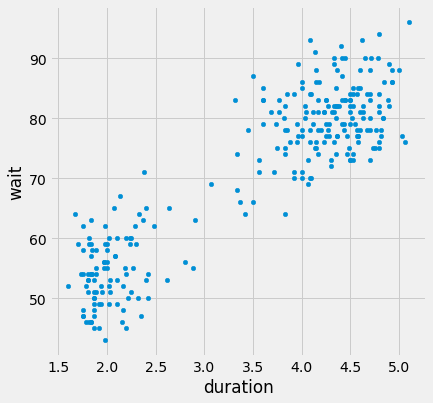

In [3]:
faithful.plot.scatter('duration', 'wait')
plt.show()

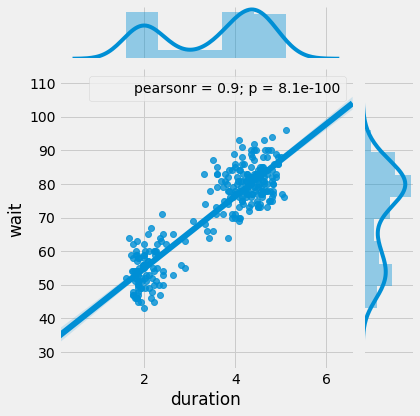

In [57]:
sns.jointplot('duration', 'wait', faithful, kind='reg')
plt.show()

In [4]:
faithful.corr()

,duration,wait
duration,1.00,0.90
wait,0.90,1.00


In [33]:
X = faithful['duration'].values.reshape(-1, 1)
y = faithful['wait']

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(train_X, train_y)

# Coefficients and intercept
print(model.coef_, model.intercept_)

# Coefficient of determination in test set
model.score(test_X, test_y)

[10.87878491] 32.81211009274683


0.72198526923707

In [34]:
# MAE
predicted_waits = model.predict(test_X)
mean_absolute_error(test_y, predicted_waits)

5.077399866461081

In [48]:
# Some predictions
model.predict(np.array([1, 2, 3, 4, 5]).reshape(-1, 1))

array([43.690895  , 54.56967991, 65.44846481, 76.32724972, 87.20603463])